# Capstone Project - The Battle of the Neighborhoods 

###  Applied Data Science Capstone by IBM/Coursera


<b> Table of contents: </b>
* [Introduction](#introduction)
* [Business Problem](#business)
* [Target Audience](#target)
* [Data](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)

## Introduction <a name="introduction"></a>

Seattle is a seaport city on the West Coast of the United States. It is the seat of King County, Washington. With a 2019 population of 753,675, it is the largest city in both the state of Washington and the Pacific Northwest region of North America. The Seattle metropolitan area's population is 3.98 million, making it the 15th-largest in the United States. It is most diversified as a lot of people from different countries live there. It's over 41 million visitors have been travelled to Seattle from all over the world in 2019. 

Therefore, it offers many business opportunities for people who wants to operate their own business. Comprehensive consideration of analysis for the business expansion is so much important as it is directly proportional to the cost of the business. The analysis from this report help people strategically pick the suitable location to open a new restaurant.

## Business Problem <a name="Business Problem"></a>

The objective of this capstone project is to analyze and select the best location in Seattle to open a new Chinese restaurant. Using data science methodology and machine learning techniques like clustering. The assumption behind the analysis is that we can use unsupervised machine learning to create clusters of districts that will provide us a list of areas for consideration for the restaurant. 

This capstone project aims to provide solutions to answer the business question: if a businessman is looking for a location to open a new Chinese restaurant, where would you recommend that they open it?

## Target Audience <a name="Target Audience"></a>

The target audience of this project include people who are insterested in opening a new Chinese restaurant or any other typies of restaurant in Seattle.

## Data

To tackle the above mentioned question, we need to have the dataset that contains

1. List of the neighborhoods of Seattle -> this comes from the Wikipedia page
2. Geo-coordinates of the neighborhoods in Seattle -> this is obtained via geocoder
3. Top venues of neighborhoods -> Foursquare API is used to collect the venue data

## Methodology 

After scraping and exploring the data, we will get latitude and longitude coordinates by using Geocoder. We will use Foursquares API to get venue data. 
For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used. We will also visualize the clusters in a map using Folium.

### Source

The wikipedia page https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle is the major source that is being used to obtain all the neighborhoods of Seattle. We then use beautifulsoup4 package, a Python module that helps to scrape information from the web pages to extract all the tables from this wikipedia page and convert it into a pandas dataframe. Then we use Python’s geopy package to obtain the latitude and longitude of all the neighborhoods present in the dataframe.

In [3]:
!pip install scikit-learn==0.24.2

!pip install -U numpy

!pip install -U pandas

!pip install -U scipy

!pip install -U imbalanced-learn

!pip install geocoder


     |████████████████████████████████| 98 kB 14.4 MB/s eta 0:00:01


In [4]:
!pip install beautifulsoup4
!pip install lxml
!pip install html5lib
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import geocoder # to get coordinates

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1


## Putting the Data together
### Scrap data from Wikipedia page into a DataFrame.

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of neighborhoods in Seattle - Wikipedia</title>


,Neighborhood name,Within larger district,Annexed[41],Locator map,Street map,Image,Notes
1,North Seattle,Seattle,Various,,,,North of the Lake Washington Ship Canal[42]
2,Broadview,North Seattle[42],1954[43],,,,[44]
3,Bitter Lake,North Seattle[42],1954[43],,,,[45]
4,North Beach / Blue Ridge,North Seattle[42],"1940,[43] 1954[43]",,"<img alt=""Seattle North Beach - Blue Ridge map.jpg"" data-file-height=""924"" data-file-width=""1221"" decoding=""async"" height=""76"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Seattle_North_Beach_-_Blue_Ridge_map.jpg/100px-Seattle_North_Beach_-_Blue_Ridge_map.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Seattle_North_Beach_-_Blue_Ridge_map.jpg/150px-Seattle_North_Beach_-_Blue_Ridge_map.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Seattle_North_Beach_-_Blue_Ridge_map.jpg/200px-Seattle_North_Beach_-_Blue_Ridge_map.jpg 2x"" width=""100""/>",,[46]
5,Crown Hill,North Seattle[42],"1907,[47] 1952,[43] 1954[43]",,,"<img alt=""Seattle - Holman Road, 1959.jpg"" data-file-height=""990"" data-file-width=""1457"" decoding=""async"" height=""102"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Seattle_-_Holman_Road%2C_1959.jpg/150px-Seattle_-_Holman_Road%2C_1959.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Seattle_-_Holman_Road%2C_1959.jpg/225px-Seattle_-_Holman_Road%2C_1959.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Seattle_-_Holman_Road%2C_1959.jpg/300px-Seattle_-_Holman_Road%2C_1959.jpg 2x"" width=""150""/>",[48]
6,Greenwood,North Seattle[42],"1891,[43] 1954[43]",,,,[49]
7,Northgate,North Seattle[42],various 1891-1954[43],,,"<img alt=""Seattle - Northgate branch library 01.jpg"" data-file-height=""2848"" data-file-width=""4288"" decoding=""async"" height=""100"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Seattle_-_Northgate_branch_library_01.jpg/150px-Seattle_-_Northgate_branch_library_01.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Seattle_-_Northgate_branch_library_01.jpg/225px-Seattle_-_Northgate_branch_library_01.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Seattle_-_Northgate_branch_library_01.jpg/300px-Seattle_-_Northgate_branch_library_01.jpg 2x"" width=""150""/>",[50]
8,Haller Lake,Northgate[50],1954[43],,,"<img alt=""North Seattle Household Hazardous Waste Collection Facility 01.jpg"" data-file-height=""2848"" data-file-width=""4288"" decoding=""async"" height=""100"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/8/87/North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg/150px-North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/8/87/North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg/225px-North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/87/North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg/300px-North_Seattle_Household_Hazardous_Waste_Collection_Facility_01.jpg 2x"" width=""150""/>",[51]
9,Pinehurst,Northgate[50],1953[43],,,"<img alt=""Seattle - Jackson Park Golf Course, 1970.jpg"" data-file-height=""953"" data-file-width=""1200"" decoding=""async"" height=""119"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg/150px-Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg/225px-Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg/300px-Seattle_-_Jackson_Park_Golf_Course%2C_1970.jpg 2x"" width=""150""/>",[52]
10,North College Park (Licton Springs),Northgate[50],"1950, 1954[43]","<img alt=""Seattle Map - Licton Springs.png"" data-file-height=""698"" data-file-width=""394"" decoding=""async"" height

The html table is converted to Pandas DataFrame for cleaning and preprocessing.

In [6]:
dfs = pd.read_html(tab)
df = dfs[0]
df.head()

,Unnamed: 0,Neighborhood name,Within larger district,Annexed[41],Locator map,Street map,Image,Notes
0,1,North Seattle,Seattle,Various,NaN,NaN,NaN,North of the Lake Washington Ship Canal[42]
1,2,Broadview,North Seattle[42],1954[43],NaN,NaN,NaN,[44]
2,3,Bitter Lake,North Seattle[42],1954[43],NaN,NaN,NaN,[45]
3,4,North Beach / Blue Ridge,North Seattle[42],"1940,[43] 1954[43]",NaN,NaN,NaN,[46]
4,5,Crown Hill,North Seattle[42],"1907,[47] 1952,[43] 1954[43]",NaN,NaN,NaN,[48]


In [7]:
df1 = df.drop(columns=['Unnamed: 0', 'Within larger district', 'Annexed[41]', 'Locator map', 'Street map', 'Image', 'Notes'])
df1

,Neighborhood name
0,North Seattle
1,Broadview
2,Bitter Lake
3,North Beach / Blue Ridge
4,Crown Hill
...,...
122,Riverview
123,Highland Park
124,South Delridge
125,Roxhill


In [27]:
df1.rename(columns={"Neighborhood name": "Neighborhoods"}, inplace=True)
df1

,Neighborhoods
0,North Seattle
1,Broadview
2,Bitter Lake
3,North Beach / Blue Ridge
4,Crown Hill
...,...
122,Riverview
123,Highland Park
124,South Delridge
125,Roxhill


In [28]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Seattle, WA'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [29]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in df1["Neighborhoods"].tolist() ]
coords

[[47.64372437221826, -122.30293727919171],
 [47.722380000000044, -122.36497999999995],
 [47.71868000000006, -122.35029999999995],
 [47.70044000000007, -122.38417999999996],
 [47.69520000000006, -122.37409999999994],
 [47.69082000000003, -122.35528999999997],
 [47.713100000000054, -122.31929999999994],
 [47.72320000000008, -122.33869999999996],
 [47.71894000000003, -122.31399999999996],
 [47.69914000000006, -122.33967999999999],
 [47.70013000000006, -122.31764999999996],
 [47.71780000000007, -122.28317999999996],
 [47.72645000000006, -122.28800999999999],
 [47.69934000000006, -122.27834999999999],
 [47.70842000000005, -122.29610999999994],
 [47.72656000000006, -122.30259999999998],
 [47.710300000000075, -122.30719999999997],
 [47.68701000000004, -122.29493999999994],
 [47.680330000000026, -122.27289999999999],
 [47.682120000000054, -122.26080999999999],
 [47.68156000000005, -122.31675999999999],
 [47.67393000000004, -122.29913999999997],
 [47.67579000000006, -122.28733999999997],
 [47.6

In [30]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [31]:
# merge the coordinates into the original dataframe
df1['Latitude'] = df_coords['Latitude']
df1['Longitude'] = df_coords['Longitude']

In [32]:
# check the neighborhoods and the coordinates
print(df1.shape)
df1

(127, 3)


,Neighborhoods,Latitude,Longitude
0,North Seattle,47.643724,-122.302937
1,Broadview,47.722380,-122.364980
2,Bitter Lake,47.718680,-122.350300
3,North Beach / Blue Ridge,47.700440,-122.384180
4,Crown Hill,47.695200,-122.374100
...,...,...,...
122,Riverview,47.542860,-122.351860
123,Highland Park,47.529870,-122.351690
124,South Delridge,47.526480,-122.359800
125,Roxhill,47.526480,-122.371780


In [33]:
# save the DataFrame as CSV file
df1.to_csv("df1.csv", index=False)

## Use geopy library to get the latitude and longitude values of Seattle.

In [34]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

47.6038321 -122.3300624


#### Create a map of Seattle with neighborhoods superimposed on top

In [35]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

## Exploring the Districts
#### Define Foursquare Credentials and Version

In [36]:
CLIENT_ID = '5E1TZFJIXAB5GMJ3DTAGJF10DMIC0P4VNWE53MIWN1YB2GCG' # your Foursquare ID
CLIENT_SECRET = '0JQEUJUKQT5B2NMAZLVAVSFD5D3XWEVCAGZPU1244FIDBEBL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5E1TZFJIXAB5GMJ3DTAGJF10DMIC0P4VNWE53MIWN1YB2GCG
CLIENT_SECRET:0JQEUJUKQT5B2NMAZLVAVSFD5D3XWEVCAGZPU1244FIDBEBL


### Let's explore the first neighborhood in our dataframe.

In [37]:
seattle_data = df1[df1['Neighborhoods'] == 'North Seattle'].reset_index(drop=True)
seattle_data.head()

,Neighborhoods,Latitude,Longitude
0,North Seattle,47.643724,-122.302937


In [39]:
seattle_data.loc[0, 'Neighborhoods']

'North Seattle'

In [40]:
neighborhood_latitude = seattle_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = seattle_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = seattle_data.loc[0, 'Neighborhoods'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of North Seattle are 47.64372437221826, -122.30293727919171.


Getting the top 100 venues that are in North Seattle within a radius of 1000 meters. This will be obtained from Foursquare.

In [41]:
search_query = 'venues'
radius = 1000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5E1TZFJIXAB5GMJ3DTAGJF10DMIC0P4VNWE53MIWN1YB2GCG&client_secret=0JQEUJUKQT5B2NMAZLVAVSFD5D3XWEVCAGZPU1244FIDBEBL&v=20180605&ll=47.64372437221826,-122.30293727919171&radius=1000&limit=100'

Getting the json of venues

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60cbccbd0310a33110e9b191'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Montlake',
  'headerFullLocation': 'Montlake, Seattle',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 47.65272438121827,
    'lng': -122.28960391180401},
   'sw': {'lat': 47.63472436321825, 'lng': -122.31627064657941}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '42951180f964a5203c241fe3',
       'name': 'Cafe Lago',
       'location': {'address': '2305 24th Ave E',
        'lat': 47.6396977895486,
        'lng': -122.30225550533684,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.63969778

Defining a function to get categories

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [44]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Cafe Lago,Italian Restaurant,47.639698,-122.302256
1,Washington Park Arboretum,Botanical Garden,47.637960,-122.296101
2,Montlake Playfield,Park,47.641520,-122.309180
3,Montlake Cut,Canal,47.647094,-122.304686
4,Arboretum Waterfront Trail,Trail,47.642934,-122.291802


And how many venues were returned by Foursquare?

In [46]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

32 venues were returned by Foursquare.


In [47]:
nearby_venues

,name,categories,lat,lng
0,Cafe Lago,Italian Restaurant,47.639698,-122.302256
1,Washington Park Arboretum,Botanical Garden,47.637960,-122.296101
2,Montlake Playfield,Park,47.641520,-122.309180
3,Montlake Cut,Canal,47.647094,-122.304686
4,Arboretum Waterfront Trail,Trail,47.642934,-122.291802
5,Fuel Coffee - Montlake,Coffee Shop,47.639688,-122.302009
6,UW: Rainier Vista,Park,47.652443,-122.306005
7,Interlaken Park,Park,47.635350,-122.307379
8,Traveler Montlake,American Restaurant,47.639830,-122.302231
9,Graham Visitor Center,Tourist Information Center,47.640143,-122.294105


### Now let's explore the other districts as well

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
seattle_venues = getNearbyVenues(names=df1['Neighborhoods'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

North Seattle
Broadview
Bitter Lake
North Beach / Blue Ridge
Crown Hill
Greenwood
Northgate
Haller Lake
Pinehurst
North College Park (Licton Springs)
Maple Leaf
Lake City
Cedar Park
Matthews Beach
Meadowbrook
Olympic Hills
Victory Heights
Wedgwood
View Ridge
Sand Point
Roosevelt
Ravenna
Bryant
Windermere
Hawthorne Hills
Laurelhurst
University District (U District)
University Village
Wallingford
Northlake
Green Lake
Fremont
Phinney Ridge
Ballard
West Woodland
Whittier Heights
Adams
Sunset Hill
Loyal Heights
Central Seattle
Magnolia
Lawton Park
Briarcliff
Southeast Magnolia
Interbay
Queen Anne
North Queen Anne
East Queen Anne
Lower Queen Anne
West Queen Anne
Capitol Hill
Portage Bay[95] / Roanoke
Broadway
Pike-Pine Corridor / Pike/Pine[97][98][99]
Montlake
Stevens
Interlaken
Madison Valley
Renton Hill
Madison Park
Broadmoor
Lake Union
South Lake Union, Seattle
Cascade, Seattle
Westlake
Eastlake
Downtown
Denny Triangle
Belltown
Pike-Market
Central Business District
First Hill
Pioneer Squa

In [50]:
print(seattle_venues.shape)
seattle_venues.head()

(7367, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Seattle,47.643724,-122.302937,Cafe Lago,47.639698,-122.302256,Italian Restaurant
1,North Seattle,47.643724,-122.302937,Washington Park Arboretum,47.637960,-122.296101,Botanical Garden
2,North Seattle,47.643724,-122.302937,Montlake Playfield,47.641520,-122.309180,Park
3,North Seattle,47.643724,-122.302937,Montlake Cut,47.647094,-122.304686,Canal
4,North Seattle,47.643724,-122.302937,Arboretum Waterfront Trail,47.642934,-122.291802,Trail


Now, checking how many venues were collected for other districts as well.

In [52]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adams,72,72,72,72,72,72
Alki Point,51,51,51,51,51,51
Arbor Heights,8,8,8,8,8,8
Atlantic,59,59,59,59,59,59
Ballard,100,100,100,100,100,100
...,...,...,...,...,...,...
West Woodland,100,100,100,100,100,100
Westlake,57,57,57,57,57,57
Whittier Heights,79,79,79,79,79,79


### Checking how many district venue categories we have

In [53]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 372 uniques categories.


## Analysis
For that, we use one hot encoding.

In [54]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
seattle_onehot.shape

(7367, 372)

Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [56]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Adams,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.013889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Alki Point,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Arbor Heights,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Atlantic,0.00,0.000000,0.0,0.016949,0.000000,0.0,0.000000,0.0,0.0,...,0.050847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Ballard,0.00,0.010000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Woodland,0.01,0.000000,0.0,0.000000,0.000000,0.0,0.010000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0
123,Westlake,0.00,0.017544,0.0,0.000000,0.017544,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
124,Whittier Heights,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.012658,0.0,0.0,...,0.012658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012658,0.0
125,Windermere,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.166667,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Let's see each neighborhood along with the top 5 most common venues

In [57]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams----
                venue  freq
0                 Bar  0.07
1        Cocktail Bar  0.06
2  Mexican Restaurant  0.06
3         Coffee Shop  0.06
4  Italian Restaurant  0.04


----Alki Point----
            venue  freq
0            Park  0.08
1     Coffee Shop  0.08
2           Beach  0.06
3  Scenic Lookout  0.06
4             Bar  0.04


----Arbor Heights----
               venue  freq
0              Trail  0.12
1              Beach  0.12
2               Pool  0.12
3  Other Repair Shop  0.12
4       Home Service  0.12


----Atlantic----
                   venue  freq
0               Bus Stop  0.07
1            Coffee Shop  0.07
2            Pizza Place  0.07
3                   Park  0.05
4  Vietnamese Restaurant  0.05


----Ballard----
                venue  freq
0                 Bar  0.06
1         Coffee Shop  0.05
2             Brewery  0.04
3  Mexican Restaurant  0.04
4        Cocktail Bar  0.04


----Beacon Hill----
                venue  freq
0  Mexican Restaurant  0.0

Putting it into a dataframe

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [79]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adams,Bar,Cocktail Bar,Mexican Restaurant,Coffee Shop,Italian Restaurant
1,Alki Point,Park,Coffee Shop,Beach,Scenic Lookout,Bar
2,Arbor Heights,Trail,Beach,Pool,Other Repair Shop,Home Service
3,Atlantic,Bus Stop,Coffee Shop,Pizza Place,Park,Vietnamese Restaurant
4,Ballard,Bar,Coffee Shop,Brewery,Mexican Restaurant,Cocktail Bar


## Using Machine Learning for Clustering Neighborhoods
For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used.
First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [70]:
max_range = 8

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = seattle_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

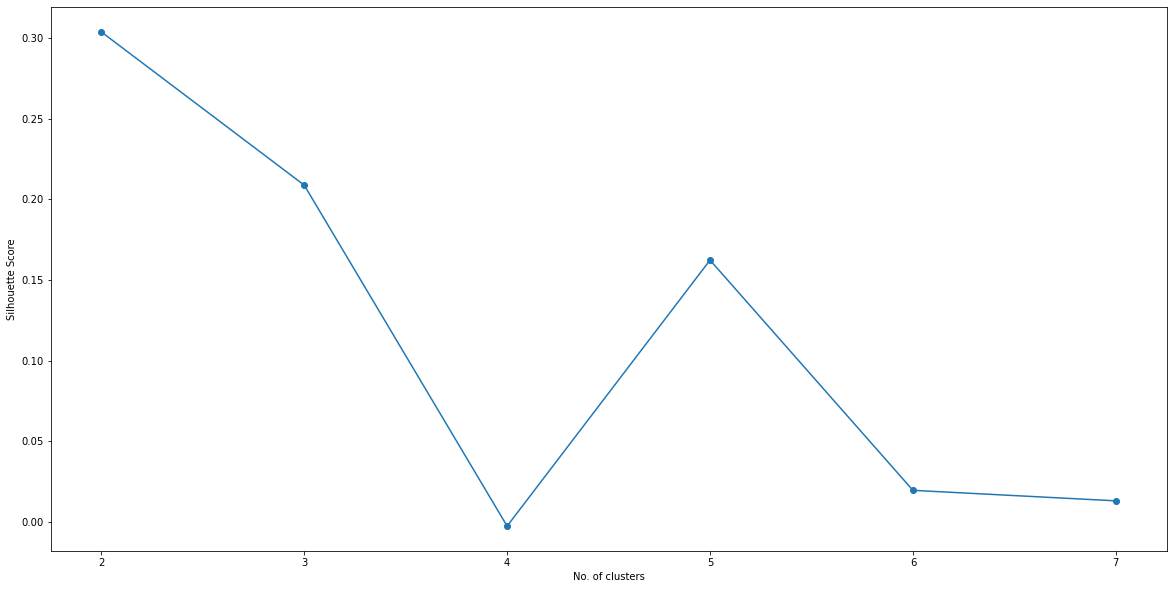

In [71]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

## Based on this graph, we can see that the optimal number of clusters is 2.
Now let's run the K-means clustering with the optimal number of clusters, which is 2.

In [72]:
# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [81]:
df1.rename(columns={'Neighborhoods':'Neighborhood'}, inplace=True)
df1.head()

,Neighborhood,Latitude,Longitude
0,North Seattle,47.643724,-122.302937
1,Broadview,47.722380,-122.364980
2,Bitter Lake,47.718680,-122.350300
3,North Beach / Blue Ridge,47.700440,-122.384180
4,Crown Hill,47.695200,-122.374100


In [83]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = df1

# merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North Seattle,47.643724,-122.302937,0,Park,Bus Stop,Trail,Harbor / Marina,Grocery Store
1,Broadview,47.722380,-122.364980,1,Trail,Construction & Landscaping,Sushi Restaurant,Thai Restaurant,Video Store
2,Bitter Lake,47.718680,-122.350300,1,Fast Food Restaurant,Furniture / Home Store,Donut Shop,Bakery,Food Truck
3,North Beach / Blue Ridge,47.700440,-122.384180,1,Park,Beach,Dance Studio,Pizza Place,Garden Center
4,Crown Hill,47.695200,-122.374100,1,Food Truck,Pizza Place,Coffee Shop,Greek Restaurant,Shipping Store
...,...,...,...,...,...,...,...,...,...
122,Riverview,47.542860,-122.351860,1,Garden,Baseball Field,Gas Station,Coffee Shop,Bakery
123,Highland Park,47.529870,-122.351690,1,Convenience Store,Baseball Field,Grocery Store,BBQ Joint,Playground
124,South Delridge,47.526480,-122.359800,1,Convenience Store,Coffee Shop,Cosmetics Shop,Pharmacy,Pizza Place
125,Roxhill,47.526480,-122.371780,1,Coffee Shop,Convenience Store,Cosmetics Shop,Soccer Field,Pharmacy


In [84]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 0

In [87]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North Seattle,Park,Bus Stop,Trail,Harbor / Marina,Grocery Store
13,Matthews Beach,Park,Trail,Playground,Locksmith,Pub
18,View Ridge,Park,Tennis Court,Soccer Field,Art Gallery,Theater
19,Sand Point,Park,Food Truck,Soccer Field,Theater,Tennis Court
23,Windermere,Park,Trail,Bank,American Restaurant,Pharmacy
24,Hawthorne Hills,Park,Trail,Picnic Area,Harbor / Marina,Arts & Crafts Store
41,Lawton Park,Park,Trail,Playground,Coffee Shop,Boat or Ferry
54,Montlake,Park,Bus Stop,Trail,Harbor / Marina,Coffee Shop
63,"Cascade, Seattle",Business Service,Playground,Trail,Golf Course,Construction & Landscaping
84,Madrona Valley,Trail,Business Service,Construction & Landscaping,Golf Course,Optical Shop


### Cluster 1

In [88]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(4, seattle_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Broadview,Trail,Construction & Landscaping,Sushi Restaurant,Thai Restaurant,Video Store
2,Bitter Lake,Fast Food Restaurant,Furniture / Home Store,Donut Shop,Bakery,Food Truck
3,North Beach / Blue Ridge,Park,Beach,Dance Studio,Pizza Place,Garden Center
4,Crown Hill,Food Truck,Pizza Place,Coffee Shop,Greek Restaurant,Shipping Store
5,Greenwood,Coffee Shop,Mexican Restaurant,Bar,Pizza Place,Sandwich Place
...,...,...,...,...,...,...
120,North Delridge,Coffee Shop,Bus Station,Park,Martial Arts School,Food Truck
122,Riverview,Garden,Baseball Field,Gas Station,Coffee Shop,Bakery
123,Highland Park,Convenience Store,Baseball Field,Grocery Store,BBQ Joint,Playground
124,South Delridge,Convenience Store,Coffee Shop,Cosmetics Shop,Pharmacy,Pizza Place


## Results

Cluster 0 is districts where Park rated at top, but behind that trail, Business Service, playground area are also present. They are mainly outdoor sport place, but not really the vibrant, lively part of the city.
Cluster 1 is the biggest cluster, but this is where we see lots of gastronomy related venues (coffee shop, fast food restaurant, food truck, pizza place, sushi restaurant, Mexican restaurant, etc..).

## Discussion

By looking at the cluster data, we can see that cluster 1 is the one that we are the most interested in. There are not so many Chinese restaurants at top 5 most common venues. It's a great opportunity for the restaurant owner to consider the districts from cluster 1 as a potential location for the new Chinese restaurant. These are the districts where gastronomy is well represented. All kinds of delicacies are concentrated in these areas. Therefore, it will attract more and more people to come here.

## Conclusion
The project was analyzed based on the toolset of data science and relied on the use of Python and Python libraries including Pandas, Scikit, Folium. Data was collected from a different type of sources and in different formats. For analysis, machine learning technique was applied. The output of the analysis provided a thorough base for the recommendation for the business problem in question.